In [1]:
!pip install spacy
!pip install wordcloud

In [2]:
!python -m spacy download en_core_web_md

2022-09-12 21:49:09.549817: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-09-12 21:49:09.549927: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-12 21:49:20.389280: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2022-09-12 21:49:20.389366: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-12 21:49:20.394887: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: DESKTOP-6BQS1FJ
2022-09-12 21:49:20.395059: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: DESKTOP-6BQS1FJ
ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\icon\Anaconda3\lib\site-packages\pip

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [4]:
Apple = pd.read_csv("C:/Users/icon/Downloads/Apple Watch Review.csv",encoding='latin',error_bad_lines = False)
Apple

C:\Users\icon\AppData\Local\Temp\ipykernel_6628\657214347.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  Apple = pd.read_csv("C:/Users/icon/Downloads/Apple Watch Review.csv",encoding='latin',error_bad_lines = False)


,Index,Review Content
0,0,I waited a few months to write this review bec...
1,1,I was a little skeptical about whether Id rea...
2,2,"My fitness tracker was about 7 years old, and ..."
3,3,I love apple products. I have been using Apple...
4,4,"Initially, my husband and I bought our Apple W..."
...,...,...
1015,1015,So whats the point in paying all of this mone...
1016,1016,"So far I like the watch,not real crazy on the ..."
1017,1017,Awesome product from Apple! First time to have...
1018,1018,My first Apple Watch didnt disappoint @ all. ...


In [5]:
# Apple=Apple['Review Content']
# Apple

In [6]:
Apple=Apple['Review Content']
Apple=Apple.astype(str)
Apple=Apple[Apple.str.contains('nan')==False]
Apple

0       I waited a few months to write this review bec...
1       I was a little skeptical about whether Id rea...
2       My fitness tracker was about 7 years old, and ...
3       I love apple products. I have been using Apple...
4       Initially, my husband and I bought our Apple W...
                              ...                        
1015    So whats the point in paying all of this mone...
1016    So far I like the watch,not real crazy on the ...
1017    Awesome product from Apple! First time to have...
1018    My first Apple Watch didnt disappoint @ all. ...
1019                     It does everything I need it to.
Name: Review Content, Length: 1007, dtype: object

In [7]:
# remove both the leading and the trailing characters
Apple= [y.strip() for y in Apple]
Apple

["I waited a few months to write this review because I needed time to accept and appreciate this watch. I am a former die-hard Fitbit user and I never, ever wanted an Apple Watch. My Fitbit did it all and for a third of the price. Sure it had annoying quirks and short-comings, but it counted my steps, told me my heart rate every min of every day, and it tracked my sleep. Well, when Fitbit got greedy and moved all of the cool new features under a subscription plan I tossed my Fitbit loyalty.\n\nThe first few days I had this watch I was ready to throw it out the window. I HATED it. 1.5 days of battery life? Gross! And how dare they not let me see my step count and my heart rate on my watch face?!!? I even went as far as downloading a third party app just so I could get my step count on my watch face. You know what? It doesn't work unless you want to keep a third party app up and running all day long, collecting your info and doing who knows what with it?! You know what else? You are stil

In [8]:
# removes empty strings, because they are considered in Python as False
Apple= [x for x in Apple if x] 
Apple 

["I waited a few months to write this review because I needed time to accept and appreciate this watch. I am a former die-hard Fitbit user and I never, ever wanted an Apple Watch. My Fitbit did it all and for a third of the price. Sure it had annoying quirks and short-comings, but it counted my steps, told me my heart rate every min of every day, and it tracked my sleep. Well, when Fitbit got greedy and moved all of the cool new features under a subscription plan I tossed my Fitbit loyalty.\n\nThe first few days I had this watch I was ready to throw it out the window. I HATED it. 1.5 days of battery life? Gross! And how dare they not let me see my step count and my heart rate on my watch face?!!? I even went as far as downloading a third party app just so I could get my step count on my watch face. You know what? It doesn't work unless you want to keep a third party app up and running all day long, collecting your info and doing who knows what with it?! You know what else? You are stil

In [9]:
# Joining the list into one string/text
text = ' '.join(Apple)
text

'I waited a few months to write this review because I needed time to accept and appreciate this watch. I am a former die-hard Fitbit user and I never, ever wanted an Apple Watch. My Fitbit did it all and for a third of the price. Sure it had annoying quirks and short-comings, but it counted my steps, told me my heart rate every min of every day, and it tracked my sleep. Well, when Fitbit got greedy and moved all of the cool new features under a subscription plan I tossed my Fitbit loyalty.\n\nThe first few days I had this watch I was ready to throw it out the window. I HATED it. 1.5 days of battery life? Gross! And how dare they not let me see my step count and my heart rate on my watch face?!!? I even went as far as downloading a third party app just so I could get my step count on my watch face. You know what? It doesn\'t work unless you want to keep a third party app up and running all day long, collecting your info and doing who knows what with it?! You know what else? You are stil

In [10]:
#Punctuation

# with arguments (x, y, z)
# where 'x' and 'y' must be equal-length strings
# and characters in 'x' are replaced by characters in 'y'.
# 'z' is a string to be deleted (string.punctuation here)

no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) 
no_punc_text

'I waited a few months to write this review because I needed time to accept and appreciate this watch I am a former diehard Fitbit user and I never ever wanted an Apple Watch My Fitbit did it all and for a third of the price Sure it had annoying quirks and shortcomings but it counted my steps told me my heart rate every min of every day and it tracked my sleep Well when Fitbit got greedy and moved all of the cool new features under a subscription plan I tossed my Fitbit loyalty\n\nThe first few days I had this watch I was ready to throw it out the window I HATED it 15 days of battery life Gross And how dare they not let me see my step count and my heart rate on my watch face I even went as far as downloading a third party app just so I could get my step count on my watch face You know what It doesnt work unless you want to keep a third party app up and running all day long collecting your info and doing who knows what with it You know what else You are still getting steps in even if yo

In [11]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
sample = "Hey, Hii!!!, How r u? "
sample

'Hey, Hii!!!, How r u? '

In [13]:
t = sample.maketrans('H','F','!')
t

{72: 70, 33: None}

In [14]:
sample.translate(t)

'Fey, Fii, Fow r u? '

In [15]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\icon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
#Tokenization
from nltk.tokenize import word_tokenize

text_tokens = word_tokenize(no_punc_text)
text_tokens

['I',
 'waited',
 'a',
 'few',
 'months',
 'to',
 'write',
 'this',
 'review',
 'because',
 'I',
 'needed',
 'time',
 'to',
 'accept',
 'and',
 'appreciate',
 'this',
 'watch',
 'I',
 'am',
 'a',
 'former',
 'diehard',
 'Fitbit',
 'user',
 'and',
 'I',
 'never',
 'ever',
 'wanted',
 'an',
 'Apple',
 'Watch',
 'My',
 'Fitbit',
 'did',
 'it',
 'all',
 'and',
 'for',
 'a',
 'third',
 'of',
 'the',
 'price',
 'Sure',
 'it',
 'had',
 'annoying',
 'quirks',
 'and',
 'shortcomings',
 'but',
 'it',
 'counted',
 'my',
 'steps',
 'told',
 'me',
 'my',
 'heart',
 'rate',
 'every',
 'min',
 'of',
 'every',
 'day',
 'and',
 'it',
 'tracked',
 'my',
 'sleep',
 'Well',
 'when',
 'Fitbit',
 'got',
 'greedy',
 'and',
 'moved',
 'all',
 'of',
 'the',
 'cool',
 'new',
 'features',
 'under',
 'a',
 'subscription',
 'plan',
 'I',
 'tossed',
 'my',
 'Fitbit',
 'loyalty',
 'The',
 'first',
 'few',
 'days',
 'I',
 'had',
 'this',
 'watch',
 'I',
 'was',
 'ready',
 'to',
 'throw',
 'it',
 'out',
 'the',
 'wind

In [17]:
text_tokens[0:75]

['I',
 'waited',
 'a',
 'few',
 'months',
 'to',
 'write',
 'this',
 'review',
 'because',
 'I',
 'needed',
 'time',
 'to',
 'accept',
 'and',
 'appreciate',
 'this',
 'watch',
 'I',
 'am',
 'a',
 'former',
 'diehard',
 'Fitbit',
 'user',
 'and',
 'I',
 'never',
 'ever',
 'wanted',
 'an',
 'Apple',
 'Watch',
 'My',
 'Fitbit',
 'did',
 'it',
 'all',
 'and',
 'for',
 'a',
 'third',
 'of',
 'the',
 'price',
 'Sure',
 'it',
 'had',
 'annoying',
 'quirks',
 'and',
 'shortcomings',
 'but',
 'it',
 'counted',
 'my',
 'steps',
 'told',
 'me',
 'my',
 'heart',
 'rate',
 'every',
 'min',
 'of',
 'every',
 'day',
 'and',
 'it',
 'tracked',
 'my',
 'sleep',
 'Well',
 'when']

In [18]:
len(text_tokens)

47275

In [19]:
#Remove stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\icon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
my_stop_words = stopwords.words('english')
my_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [21]:
# Simplified look of the no_stop_tokes for loop
""" final_words = []
  for word in text_tokens:
   if word in my_stop_words:
     'do nothing'
   else:
     final_words.append(word)"""

no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:70])

['I', 'waited', 'months', 'write', 'review', 'I', 'needed', 'time', 'accept', 'appreciate', 'watch', 'I', 'former', 'diehard', 'Fitbit', 'user', 'I', 'never', 'ever', 'wanted', 'Apple', 'Watch', 'My', 'Fitbit', 'third', 'price', 'Sure', 'annoying', 'quirks', 'shortcomings', 'counted', 'steps', 'told', 'heart', 'rate', 'every', 'min', 'every', 'day', 'tracked', 'sleep', 'Well', 'Fitbit', 'got', 'greedy', 'moved', 'cool', 'new', 'features', 'subscription', 'plan', 'I', 'tossed', 'Fitbit', 'loyalty', 'The', 'first', 'days', 'I', 'watch', 'I', 'ready', 'throw', 'window', 'I', 'HATED', '15', 'days', 'battery', 'life']


In [22]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:50])

['i', 'waited', 'months', 'write', 'review', 'i', 'needed', 'time', 'accept', 'appreciate', 'watch', 'i', 'former', 'diehard', 'fitbit', 'user', 'i', 'never', 'ever', 'wanted', 'apple', 'watch', 'my', 'fitbit', 'third', 'price', 'sure', 'annoying', 'quirks', 'shortcomings', 'counted', 'steps', 'told', 'heart', 'rate', 'every', 'min', 'every', 'day', 'tracked', 'sleep', 'well', 'fitbit', 'got', 'greedy', 'moved', 'cool', 'new', 'features', 'subscription']


In [23]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:50])

['i', 'wait', 'month', 'write', 'review', 'i', 'need', 'time', 'accept', 'appreci', 'watch', 'i', 'former', 'diehard', 'fitbit', 'user', 'i', 'never', 'ever', 'want', 'appl', 'watch', 'my', 'fitbit', 'third', 'price', 'sure', 'annoy', 'quirk', 'shortcom', 'count', 'step', 'told', 'heart', 'rate', 'everi', 'min', 'everi', 'day', 'track', 'sleep', 'well', 'fitbit', 'got', 'greedi', 'move', 'cool', 'new', 'featur', 'subscript']


In [24]:
!python -m spacy download en

[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2022-09-12 21:51:13.380780: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-09-12 21:51:13.380849: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-12 21:51:30.170298: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2022-09-12 21:51:30.170359: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-12 21:51:30.178280: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: DESKTOP-6BQS1FJ
2022-09-12 21:51:30.181647: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: DESKTOP-6BQS1FJ


In [25]:
# NLP english language model of spacy library
nlp = spacy.load('en_core_web_sm')

In [26]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:50])

I waited months write review I needed time accept appreciate watch I former diehard Fitbit user I never ever wanted Apple Watch My Fitbit third price Sure annoying quirks shortcomings counted steps told heart rate every min every day tracked sleep Well Fitbit got greedy moved cool new features subscription


In [27]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['I', 'wait', 'month', 'write', 'review', 'I', 'need', 'time', 'accept', 'appreciate', 'watch', 'I', 'former', 'diehard', 'Fitbit', 'user', 'I', 'never', 'ever', 'want', 'Apple', 'Watch', 'my', 'Fitbit', 'third']


### Feature Extraction 

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [29]:
pd.DataFrame.from_records([vectorizer.vocabulary_])

,wait,month,write,review,need,time,accept,appreciate,watch,former,...,bfriend,sim,activation,afterpay,65,shift,watchnot,bandwill,humid,doesdon
0,3094,1851,3216,2423,1906,2889,116,289,3117,1217,...,413,2571,139,186,89,2543,3126,369,1442,910


In [30]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T

,0
wait,3094
month,1851
write,3216
review,2423
need,1906
...,...
shift,2543
watchnot,3126
bandwill,369
humid,1442


In [31]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=False).head(50)

,0
útile,3240
único,3239
él,3238
ágil,3237
zillion,3236
zero,3235
zenwatch,3234
yr,3233
youtube,3232
young,3231


In [32]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=True).head(50)

,0
02,0
10,1
100,2
1000,3
1010,4
11,5
12,6
120,7
12000,8
13,9


In [33]:
print(vectorizer.vocabulary_)

{'wait': 3094, 'month': 1851, 'write': 3216, 'review': 2423, 'need': 1906, 'time': 2889, 'accept': 116, 'appreciate': 289, 'watch': 3117, 'former': 1217, 'diehard': 859, 'fitbit': 1179, 'user': 3029, 'never': 1916, 'ever': 1061, 'want': 3107, 'apple': 277, 'my': 1887, 'third': 2871, 'price': 2207, 'sure': 2769, 'annoying': 255, 'quirk': 2286, 'shortcoming': 2551, 'count': 730, 'step': 2709, 'tell': 2826, 'heart': 1377, 'rate': 2297, 'every': 1062, 'min': 1807, 'day': 788, 'track': 2925, 'sleep': 2601, 'well': 3149, 'get': 1287, 'greedy': 1325, 'move': 1872, 'cool': 716, 'new': 1917, 'feature': 1149, 'subscription': 2742, 'plan': 2139, 'toss': 2916, 'loyalty': 1712, 'the': 2856, 'first': 1176, 'ready': 2313, 'throw': 2881, 'window': 3179, 'hate': 1365, '15': 14, 'battery': 382, 'life': 1643, 'gross': 1328, 'and': 246, 'dare': 780, 'let': 1640, 'see': 2505, 'face': 1113, 'even': 1057, 'go': 1302, 'far': 1137, 'download': 921, 'party': 2067, 'app': 272, 'could': 728, 'you': 3230, 'know': 

In [34]:
print(vectorizer.get_feature_names()[50:100])

['30min', '30w', '31', '32', '329', '32900', '330', '34', '35', '359', '36', '371', '379', '38', '3month', '3rd', '3x', '40', '400', '40000', '41', '410', '419', '41mm', '45', '48', '48hr', '4s', '4th', '50', '501', '530pm', '54', '56', '5s', '5se6', '60', '629', '630', '65', '67', '6x', '70', '7000', '79', '7th', '80', '800', '81', '85']


In [35]:
print(X.toarray()[50:100])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [36]:
print(X.toarray().shape)

(28296, 3241)


#### Let's see how can bigrams and trigrams can be included here

In [37]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',
                                         ngram_range=(1,3),
                                         max_features = 100)

bow_matrix_ngram = vectorizer_ngram_range.fit_transform(Apple)
bow_matrix_ngram

<1007x100 sparse matrix of type '<class 'numpy.int64'>'
	with 15967 stored elements in Compressed Sparse Row format>

In [38]:
print(vectorizer_ngram_range.get_feature_names())

['about', 'all', 'also', 'am', 'an', 'and', 'and it', 'and the', 'apple', 'apple watch', 'apps', 'are', 'as', 'at', 'battery', 'battery life', 'be', 'because', 'bought', 'but', 'can', 'charge', 'day', 'do', 'does', 'don', 'easy', 'everything', 'features', 'for', 'for the', 'from', 'get', 'good', 'got', 'great', 'had', 'has', 'have', 'health', 'heart', 'how', 'if', 'if you', 'in', 'iphone', 'is', 'it', 'it is', 'just', 'life', 'like', 'love', 'me', 'more', 'much', 'my', 'my watch', 'new', 'no', 'not', 'now', 'of', 'of the', 'on', 'one', 'only', 'or', 'out', 'phone', 'really', 'screen', 'series', 'sleep', 'so', 'than', 'that', 'the', 'the battery', 'the watch', 'there', 'this', 'this watch', 'time', 'to', 'up', 'use', 'very', 'was', 'watch', 'watch is', 'what', 'when', 'will', 'with', 'with the', 'works', 'would', 'you', 'your']


In [39]:
print(bow_matrix_ngram.toarray())

[[2 7 0 ... 0 9 2]
 [2 3 0 ... 0 4 0]
 [1 2 3 ... 1 3 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#### TFidf vectorizer

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",
                                                 analyzer='word',
                                                 ngram_range=(1,3),
                                                 max_features = 10)

tf_idf_matrix_n_gram_max_features = vectorizer_n_gram_max_features.fit_transform(Apple)

In [41]:
print(vectorizer_n_gram_max_features.get_feature_names())

['and', 'apple', 'for', 'is', 'it', 'my', 'the', 'this', 'to', 'watch']


In [42]:
print(tf_idf_matrix_n_gram_max_features.toarray())

[[0.5708378  0.2013862  0.07793843 ... 0.11790512 0.23603098 0.19122285]
 [0.34316174 0.16797662 0.1625215  ... 0.2185442  0.17499902 0.32717816]
 [0.3615906  0.03371381 0.16309468 ... 0.19738346 0.18439701 0.27087393]
 ...
 [0.         0.66200236 0.         ... 0.32298418 0.51725843 0.24176658]
 [0.42045023 0.54882427 0.         ... 0.         0.         0.40086674]
 [0.         0.         0.         ... 0.         0.48432109 0.        ]]


####  Generate wordcloud

In [43]:
# Define a function to plot word cloud

def plot_cloud(wordcloud):
    
    # Set figure size
    plt.figure(figsize=(60, 40))

    # Display image
    plt.imshow(wordcloud) 
    
    # No axis details
    plt.axis("off")

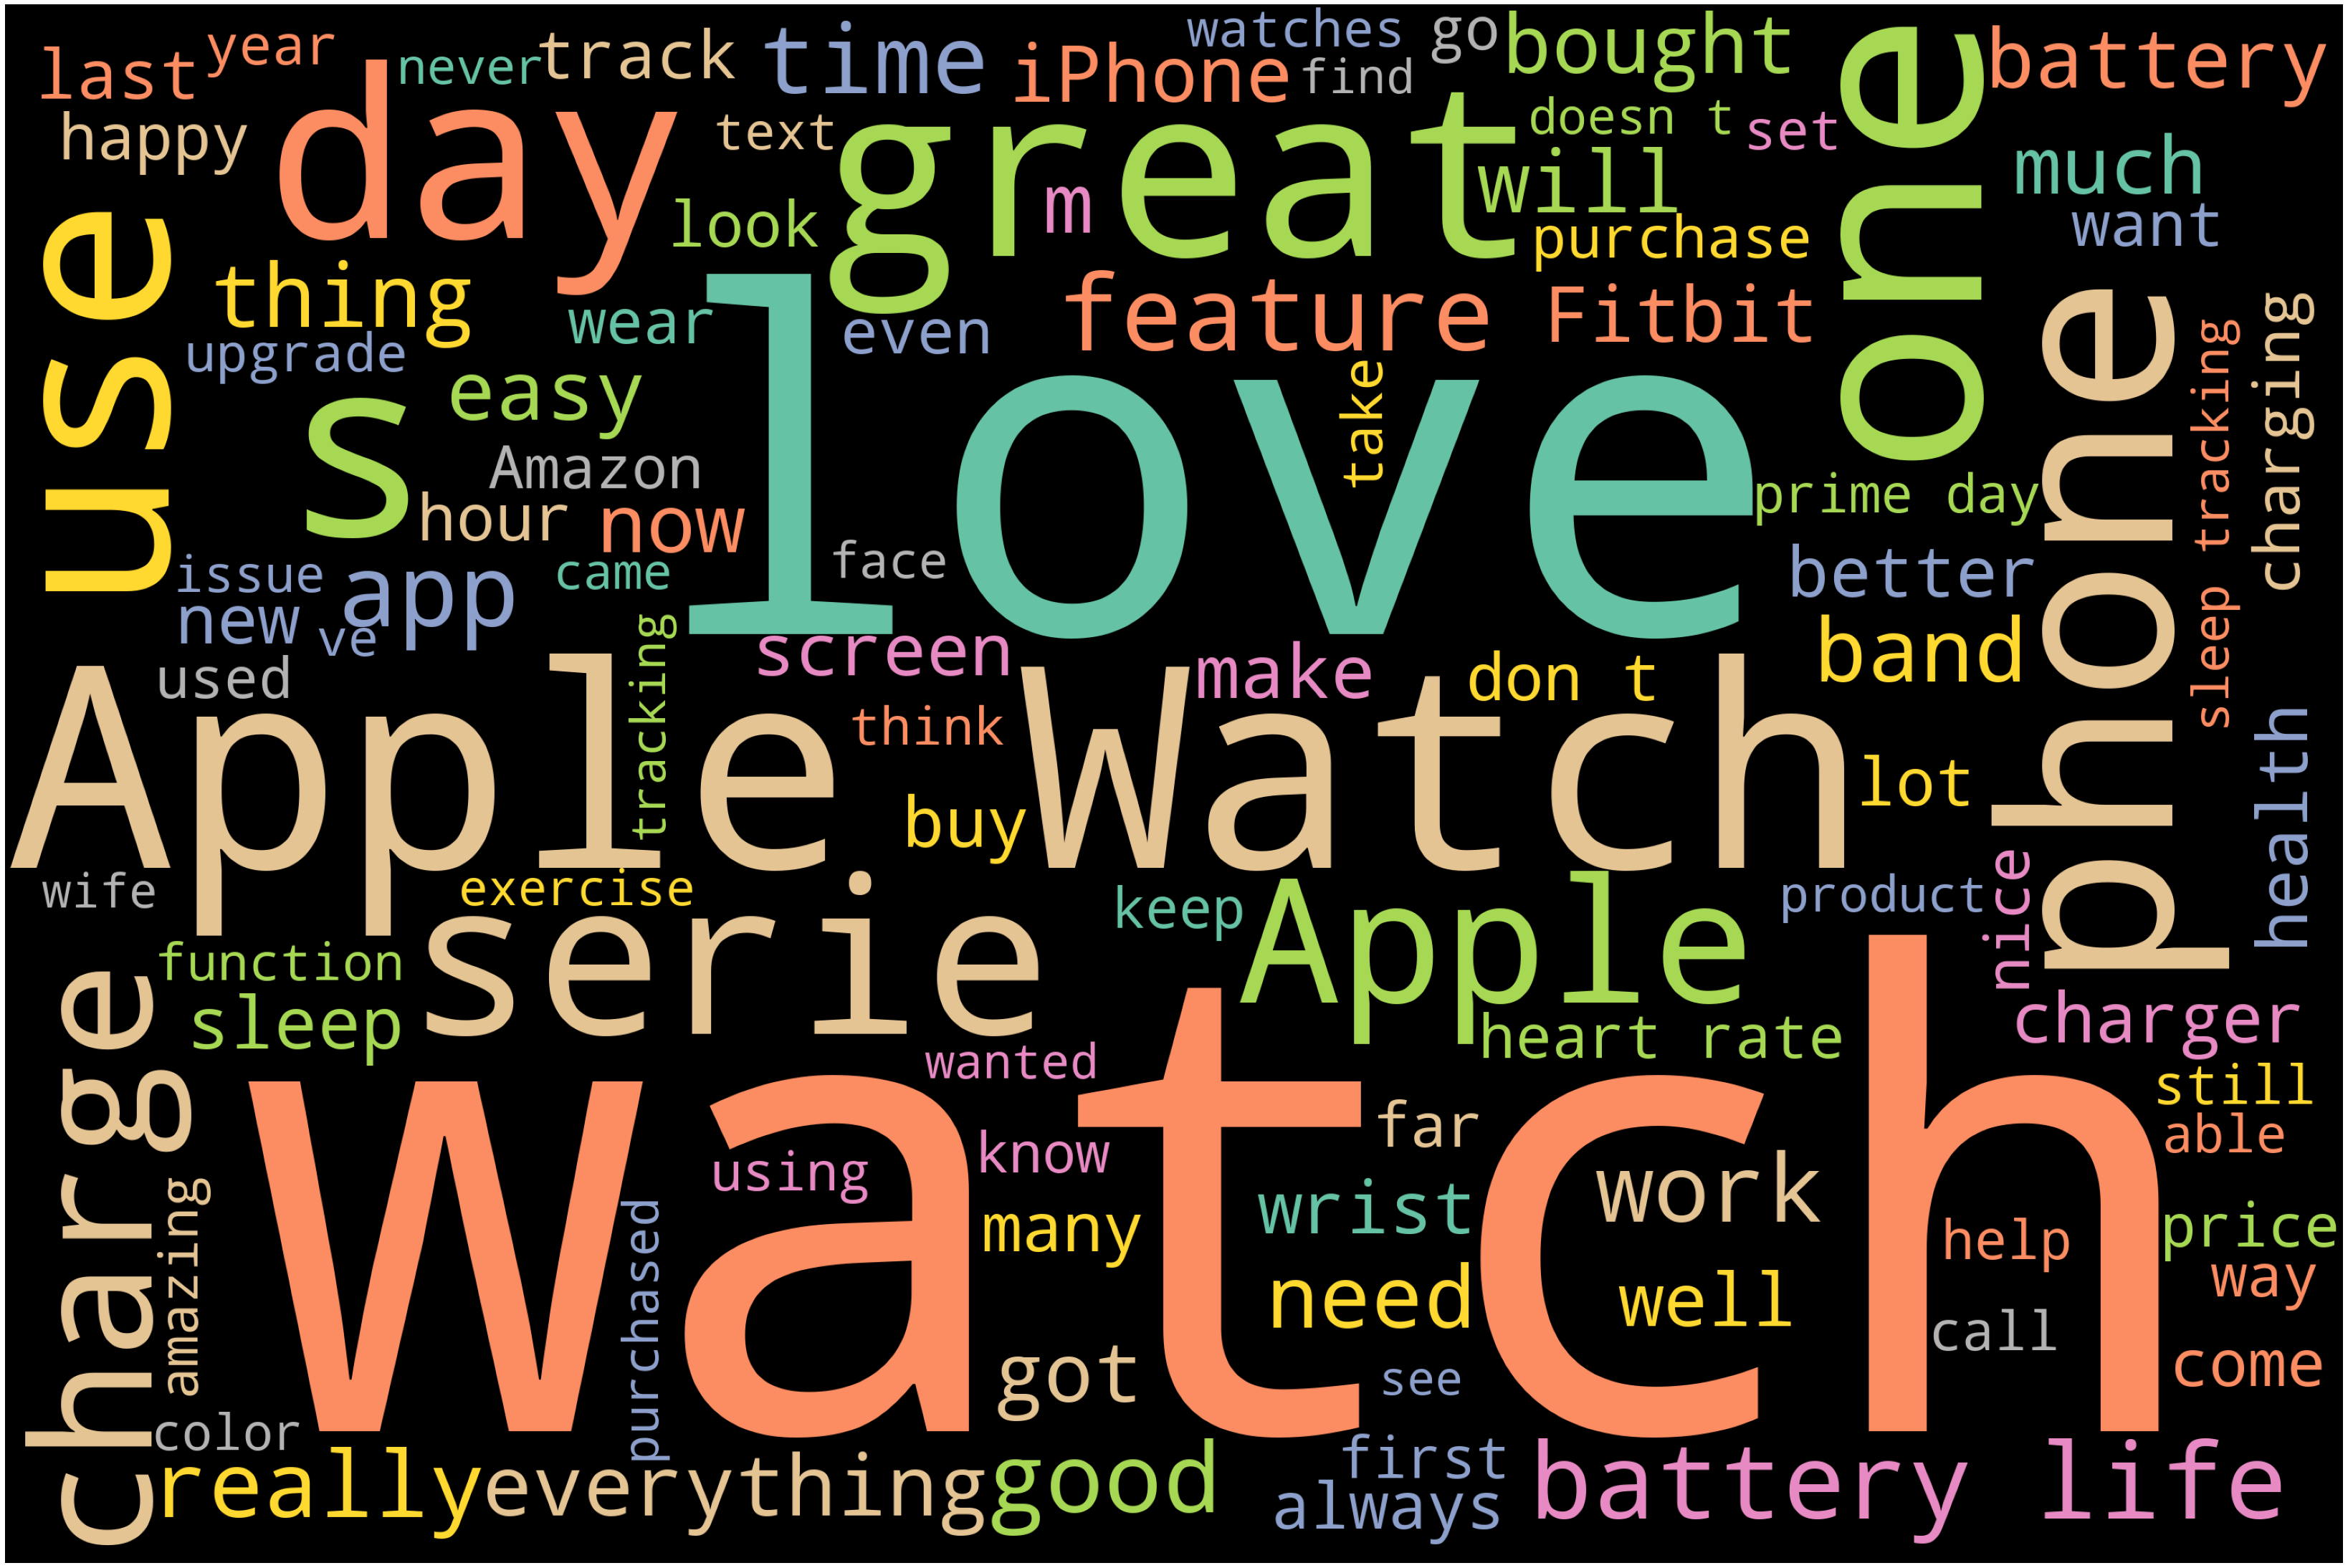

In [44]:
# Generate wordcloud
wordcloud = WordCloud(width = 3000, 
                      height = 2000,
                      background_color='black',
                      max_words=100,
                      colormap='Set2').generate(text)
# Plot
plot_cloud(wordcloud)

In [45]:
###Execute below command through anaconda command prompt
!python -m spacy download en

[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2022-09-12 21:55:19.021466: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-09-12 21:55:19.021537: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-12 21:55:44.756912: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2022-09-12 21:55:44.756957: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-12 21:55:44.762405: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: DESKTOP-6BQS1FJ
2022-09-12 21:55:44.762581: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: DESKTOP-6BQS1FJ


In [46]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [47]:
Apple = pd.read_csv("C:/Users/icon/Downloads/Apple Watch Review.csv",encoding='latin',error_bad_lines = False)
Apple

C:\Users\icon\AppData\Local\Temp\ipykernel_6628\657214347.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  Apple = pd.read_csv("C:/Users/icon/Downloads/Apple Watch Review.csv",encoding='latin',error_bad_lines = False)


,Index,Review Content
0,0,I waited a few months to write this review bec...
1,1,I was a little skeptical about whether Id rea...
2,2,"My fitness tracker was about 7 years old, and ..."
3,3,I love apple products. I have been using Apple...
4,4,"Initially, my husband and I bought our Apple W..."
...,...,...
1015,1015,So whats the point in paying all of this mone...
1016,1016,"So far I like the watch,not real crazy on the ..."
1017,1017,Awesome product from Apple! First time to have...
1018,1018,My first Apple Watch didnt disappoint @ all. ...


In [48]:
name = "       bjfviygviuyv      "

name.strip()

'bjfviygviuyv'

In [49]:
Apple=Apple['Review Content']
Apple=Apple.astype(str)
Apple=Apple[Apple.str.contains('nan')==False]
Apple

0       I waited a few months to write this review bec...
1       I was a little skeptical about whether Id rea...
2       My fitness tracker was about 7 years old, and ...
3       I love apple products. I have been using Apple...
4       Initially, my husband and I bought our Apple W...
                              ...                        
1015    So whats the point in paying all of this mone...
1016    So far I like the watch,not real crazy on the ...
1017    Awesome product from Apple! First time to have...
1018    My first Apple Watch didnt disappoint @ all. ...
1019                     It does everything I need it to.
Name: Review Content, Length: 1007, dtype: object

In [50]:
Apple= [x.strip() for x in Apple] # remove both the leading and the trailing characters
Apple= [x for x in Apple if x] # removes empty strings, because they are considered in Python as False
Apple[0:10]

["I waited a few months to write this review because I needed time to accept and appreciate this watch. I am a former die-hard Fitbit user and I never, ever wanted an Apple Watch. My Fitbit did it all and for a third of the price. Sure it had annoying quirks and short-comings, but it counted my steps, told me my heart rate every min of every day, and it tracked my sleep. Well, when Fitbit got greedy and moved all of the cool new features under a subscription plan I tossed my Fitbit loyalty.\n\nThe first few days I had this watch I was ready to throw it out the window. I HATED it. 1.5 days of battery life? Gross! And how dare they not let me see my step count and my heart rate on my watch face?!!? I even went as far as downloading a third party app just so I could get my step count on my watch face. You know what? It doesn't work unless you want to keep a third party app up and running all day long, collecting your info and doing who knows what with it?! You know what else? You are stil

In [51]:
Apple

["I waited a few months to write this review because I needed time to accept and appreciate this watch. I am a former die-hard Fitbit user and I never, ever wanted an Apple Watch. My Fitbit did it all and for a third of the price. Sure it had annoying quirks and short-comings, but it counted my steps, told me my heart rate every min of every day, and it tracked my sleep. Well, when Fitbit got greedy and moved all of the cool new features under a subscription plan I tossed my Fitbit loyalty.\n\nThe first few days I had this watch I was ready to throw it out the window. I HATED it. 1.5 days of battery life? Gross! And how dare they not let me see my step count and my heart rate on my watch face?!!? I even went as far as downloading a third party app just so I could get my step count on my watch face. You know what? It doesn't work unless you want to keep a third party app up and running all day long, collecting your info and doing who knows what with it?! You know what else? You are stil

In [52]:
##Part Of Speech Tagging
#nlp = spacy.load('en')
nlp = spacy.load('en_core_web_sm')

In [53]:
one_block = Apple[1]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [54]:
one_block

'I was a little skeptical about whether I\x92d really find any use in this. It was a toss up between a Garmin smartwatch and this. Mostly I was getting one of them for the rowing tracking, and the Garmin watch I was looking at cost $1,000, plus had mixed reviews of its heart rate tracking. Ultimately I bought the Apple Watch because I could get it with a 25% discount on Prime Day. Plus, the Garmin had too many bells and whistles that I just didn\x92t need. Things like maps for golf courses, maps of terrain and state parks, stuff like that. I\x92m glad I went with the Apple Watch. The heart rate tracking\x92s been great plus all of the health things you can do with it. Most reviews I\x92ve seen have said the heart rate tracking\x92s been the most accurate of lots of watches and I\x92ve noticed that that\x92s probably correct. The rowing app doesn\x92t have many bells and whistles, but I\x92ve thought about integrating my Concept2 rowing machine with the watch to pull in more data. Not s

In [55]:
for token in doc_block[:]:
    print(token, token.pos_)

I PRON
was AUX
a DET
little ADJ
skeptical ADJ
about ADP
whether SCONJ
Id PRON
really ADV
find VERB
any DET
use NOUN
in ADP
this PRON
. PUNCT
It PRON
was AUX
a DET
toss NOUN
up ADP
between ADP
a DET
Garmin PROPN
smartwatch NOUN
and CCONJ
this PRON
. PUNCT
Mostly ADV
I PRON
was AUX
getting VERB
one NUM
of ADP
them PRON
for ADP
the DET
rowing NOUN
tracking NOUN
, PUNCT
and CCONJ
the DET
Garmin PROPN
watch NOUN
I PRON
was AUX
looking VERB
at ADP
cost NOUN
$ SYM
1,000 NUM
, PUNCT
plus CCONJ
had VERB
mixed ADJ
reviews NOUN
of ADP
its PRON
heart NOUN
rate NOUN
tracking NOUN
. PUNCT
Ultimately ADV
I PRON
bought VERB
the DET
Apple PROPN
Watch PROPN
because SCONJ
I PRON
could AUX
get VERB
it PRON
with ADP
a DET
25 NUM
% NOUN
discount NOUN
on ADP
Prime PROPN
Day PROPN
. PUNCT
Plus CCONJ
, PUNCT
the DET
Garmin PROPN
had VERB
too ADV
many ADJ
bells NOUN
and CCONJ
whistles NOUN
that PRON
I PRON
just ADV
didnt ADJ
need NOUN
. PUNCT
Things NOUN
like ADP
maps NOUN
for ADP
golf NOUN
courses NOUN
, PUN

In [56]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]

#print(nouns_verbs[5:25])
nouns_verbs

['find',
 'use',
 'toss',
 'smartwatch',
 'getting',
 'rowing',
 'tracking',
 'watch',
 'looking',
 'cost',
 'had',
 'reviews',
 'heart',
 'rate',
 'tracking',
 'bought',
 'get',
 '%',
 'discount',
 'had',
 'bells',
 'whistles',
 'need',
 'Things',
 'maps',
 'golf',
 'courses',
 'maps',
 'terrain',
 'state',
 'parks',
 'stuff',
 'I\x92m',
 'went',
 'heart',
 'rate',
 'tracking\x92s',
 'health',
 'things',
 'do',
 'reviews',
 'seen',
 'said',
 'heart',
 'rate',
 'lots',
 'watches',
 'I\x92ve',
 'noticed',
 'rowing',
 'app',
 'have',
 'bells',
 'whistles',
 'thought',
 'integrating',
 'rowing',
 'machine',
 'watch',
 'pull',
 'data',
 'I\x92ll',
 'do',
 'I\x92m',
 'rower',
 'do',
 'app',
 'counts',
 'calories',
 'heart',
 'rate',
 'time',
 'I\x92m',
 'assuming',
 'fitness',
 'apps',
 'running',
 'cycling',
 'count',
 'kinds',
 'things',
 'noticed',
 'calorie',
 'counter',
 'calorie',
 'counter',
 'watch',
 'algorithm\x92s',
 'used',
 'watch',
 'does',
 'lots',
 'things',
 'take',
 'tied'

In [57]:
len(nouns_verbs)

104

In [58]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
X

<104x67 sparse matrix of type '<class 'numpy.int64'>'
	with 100 stored elements in Compressed Sparse Row format>

In [59]:
X.shape

(104, 67)

In [60]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [61]:
cv.get_feature_names()

['algorithm',
 'app',
 'apps',
 'assuming',
 'bells',
 'bought',
 'calorie',
 'calories',
 'cost',
 'count',
 'counter',
 'counts',
 'courses',
 'cycling',
 'data',
 'discount',
 'do',
 'does',
 'ecosystem',
 'find',
 'fitness',
 'get',
 'getting',
 'go',
 'golf',
 'had',
 'have',
 'health',
 'heart',
 'integrating',
 'kinds',
 'll',
 'looking',
 'lots',
 'machine',
 'makes',
 'maps',
 'need',
 'noticed',
 'parks',
 'pull',
 'rate',
 'reviews',
 'rower',
 'rowing',
 'running',
 'said',
 'seen',
 'sense',
 'smartwatch',
 'state',
 'stuff',
 'take',
 'terrain',
 'things',
 'thought',
 'tied',
 'time',
 'toss',
 'tracking',
 'use',
 'used',
 've',
 'watch',
 'watches',
 'went',
 'whistles']

In [62]:
#pd.DataFrame(X.toarray(), columns = sorted(cv.vocabulary_))
# Or
temp_df = pd.DataFrame(X.toarray(), columns = cv.get_feature_names())
temp_df

,algorithm,app,apps,assuming,bells,bought,calorie,calories,cost,count,...,time,toss,tracking,use,used,ve,watch,watches,went,whistles
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
sum_words = X.sum(axis=0) #Column total
sum_words

matrix([[1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1,
         2, 1, 1, 1, 2, 1, 1, 4, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 4,
         2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 3, 1, 1, 1,
         6, 1, 1, 2]], dtype=int64)

In [64]:
type(sum_words)

numpy.matrix

In [65]:
cv.vocabulary_

{'find': 19,
 'use': 60,
 'toss': 58,
 'smartwatch': 49,
 'getting': 22,
 'rowing': 44,
 'tracking': 59,
 'watch': 63,
 'looking': 32,
 'cost': 8,
 'had': 25,
 'reviews': 42,
 'heart': 28,
 'rate': 41,
 'bought': 5,
 'get': 21,
 'discount': 15,
 'bells': 4,
 'whistles': 66,
 'need': 37,
 'things': 54,
 'maps': 36,
 'golf': 24,
 'courses': 12,
 'terrain': 53,
 'state': 50,
 'parks': 39,
 'stuff': 51,
 'went': 65,
 'health': 27,
 'do': 16,
 'seen': 47,
 'said': 46,
 'lots': 33,
 'watches': 64,
 've': 62,
 'noticed': 38,
 'app': 1,
 'have': 26,
 'thought': 55,
 'integrating': 29,
 'machine': 34,
 'pull': 40,
 'data': 14,
 'll': 31,
 'rower': 43,
 'counts': 11,
 'calories': 7,
 'time': 57,
 'assuming': 3,
 'fitness': 20,
 'apps': 2,
 'running': 45,
 'cycling': 13,
 'count': 9,
 'kinds': 30,
 'calorie': 6,
 'counter': 10,
 'algorithm': 0,
 'used': 61,
 'does': 17,
 'take': 52,
 'tied': 56,
 'ecosystem': 18,
 'makes': 35,
 'sense': 48,
 'go': 23}

In [66]:
sorted(cv.vocabulary_)

['algorithm',
 'app',
 'apps',
 'assuming',
 'bells',
 'bought',
 'calorie',
 'calories',
 'cost',
 'count',
 'counter',
 'counts',
 'courses',
 'cycling',
 'data',
 'discount',
 'do',
 'does',
 'ecosystem',
 'find',
 'fitness',
 'get',
 'getting',
 'go',
 'golf',
 'had',
 'have',
 'health',
 'heart',
 'integrating',
 'kinds',
 'll',
 'looking',
 'lots',
 'machine',
 'makes',
 'maps',
 'need',
 'noticed',
 'parks',
 'pull',
 'rate',
 'reviews',
 'rower',
 'rowing',
 'running',
 'said',
 'seen',
 'sense',
 'smartwatch',
 'state',
 'stuff',
 'take',
 'terrain',
 'things',
 'thought',
 'tied',
 'time',
 'toss',
 'tracking',
 'use',
 'used',
 've',
 'watch',
 'watches',
 'went',
 'whistles']

In [67]:
wf_df = pd.DataFrame({'word' : cv.get_feature_names(),
                      'count' : np.array(sum_words).flatten()})
wf_df

,word,count
0,algorithm,1
1,app,2
2,apps,1
3,assuming,1
4,bells,2
...,...,...
62,ve,1
63,watch,6
64,watches,1
65,went,1


In [68]:
wf_df.sort_values(by = 'count',
                  ascending = False,
                  inplace = True,
                  ignore_index = True)
wf_df

,word,count
0,watch,6
1,things,4
2,rate,4
3,heart,4
4,do,3
...,...,...
62,count,1
63,need,1
64,cost,1
65,parks,1


<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

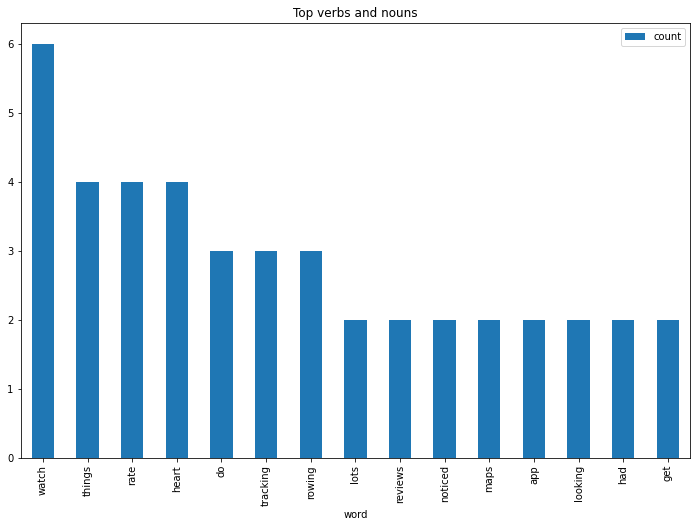

In [69]:
##Visualizing results
#Barchart for top 10 nouns + verbs
wf_df[0:15].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

#All words
#wf_df.plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

#### Emotion Mining

In [70]:
#Sentiment analysis
afinn = pd.read_csv('C:/Users/icon/Downloads/Afinn.csv', error_bad_lines=False, sep = ",", encoding = 'latin-1')
afinn

C:\Users\icon\AppData\Local\Temp\ipykernel_6628\158188421.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  afinn = pd.read_csv('C:/Users/icon/Downloads/Afinn.csv', error_bad_lines=False, sep = ",", encoding = 'latin-1')


,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [71]:
afinn[1500:]

,word,value
1500,masterpieces,4
1501,matter,1
1502,matters,1
1503,mature,2
1504,meaningful,2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [72]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\icon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [73]:
from nltk import tokenize

sentences = tokenize.sent_tokenize(" ".join(Apple))

#sentences[5:15]
sentences

['I waited a few months to write this review because I needed time to accept and appreciate this watch.',
 'I am a former die-hard Fitbit user and I never, ever wanted an Apple Watch.',
 'My Fitbit did it all and for a third of the price.',
 'Sure it had annoying quirks and short-comings, but it counted my steps, told me my heart rate every min of every day, and it tracked my sleep.',
 'Well, when Fitbit got greedy and moved all of the cool new features under a subscription plan I tossed my Fitbit loyalty.',
 'The first few days I had this watch I was ready to throw it out the window.',
 'I HATED it.',
 '1.5 days of battery life?',
 'Gross!',
 'And how dare they not let me see my step count and my heart rate on my watch face?!!?',
 'I even went as far as downloading a third party app just so I could get my step count on my watch face.',
 'You know what?',
 "It doesn't work unless you want to keep a third party app up and running all day long, collecting your info and doing who knows wh

In [74]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,I waited a few months to write this review bec...
1,I am a former die-hard Fitbit user and I never...
2,My Fitbit did it all and for a third of the pr...
3,"Sure it had annoying quirks and short-comings,..."
4,"Well, when Fitbit got greedy and moved all of ..."
...,...
3428,Using this to keep track of my physical\nactiv...
3429,My first Apple Watch didnt disappoint @ all.
3430,"So I bought a new one, and loving it."
3431,I highly recommend buying 45mm.


In [75]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [76]:
nlp = spacy.load('en_core_web_sm')

In [77]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        #print(sentence)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0) #return 0 if key not found
    return sent_score

In [78]:
# test that it works
calculate_sentiment(text = 'Amazing, wonderful session')

8

In [79]:
calculate_sentiment(text = 'wonderful session')

4

In [80]:
calculate_sentiment(text = 'What a ridiculous')

-3

In [81]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [82]:
sent_df

,sentence,sentiment_value
0,I waited a few months to write this review bec...,3
1,I am a former die-hard Fitbit user and I never...,-3
2,My Fitbit did it all and for a third of the pr...,0
3,"Sure it had annoying quirks and short-comings,...",-2
4,"Well, when Fitbit got greedy and moved all of ...",2
...,...,...
3428,Using this to keep track of my physical\nactiv...,0
3429,My first Apple Watch didnt disappoint @ all.,-2
3430,"So I bought a new one, and loving it.",3
3431,I highly recommend buying 45mm.,2


In [83]:
sent_df.iloc[4,0]

'Well, when Fitbit got greedy and moved all of the cool new features under a subscription plan I tossed my Fitbit loyalty.'

In [84]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
#sent_df['word_count'].head(10)
sent_df

,sentence,sentiment_value,word_count
0,I waited a few months to write this review bec...,3,19
1,I am a former die-hard Fitbit user and I never...,-3,15
2,My Fitbit did it all and for a third of the pr...,0,12
3,"Sure it had annoying quirks and short-comings,...",-2,27
4,"Well, when Fitbit got greedy and moved all of ...",2,22
...,...,...,...
3428,Using this to keep track of my physical\nactiv...,0,9
3429,My first Apple Watch didnt disappoint @ all.,-2,8
3430,"So I bought a new one, and loving it.",3,9
3431,I highly recommend buying 45mm.,2,5


In [85]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
1686,I love this watch many great features I went f...,12,31
1958,Love it best watch ever glad got it so happy I...,12,20
2573,"Awesome Its a very and advanced watch, I love...",13,16
2466,Apple Watch arrived on time and works great a...,13,42
2402,very good thanks Very nice and love it I like ...,13,16
1790,Should have bought the cellular model and gone...,13,60
1743,Enjoying my watch Good watch I really like it ...,14,26
680,Am really impressed with the clarity of the ca...,16,41
1265,"Apple doesnt have as nice of sleep tracking, ...",19,47
1935,Just upgraded from generation 1 so happy I did...,20,53


In [86]:
sent_df.sort_values(by='sentiment_value').head(15)

,sentence,sentiment_value,word_count
1703,I was expecting to get more monitoring functio...,-10,54
1842,Ive been doing research on my health conditio...,-7,48
1875,What is there to really say its an apple seve...,-6,42
1144,Really really stupid and poor design and they ...,-6,11
163,Not saying the bad reviews are lies; but with ...,-5,32
3094,"For me, its not about the cost to go buy a $1...",-5,38
2414,Very frustrating and quite frankly disgusting ...,-5,9
261,"It is concerning, as a dead battery could pose...",-5,11
1385,I was so worried and honestly a little ticked ...,-5,15
2489,Works perfectly- only problem is that the box ...,-5,10


In [87]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    3433.000000
mean        1.441014
std         2.417298
min       -10.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        20.000000
Name: sentiment_value, dtype: float64

In [88]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
1,I am a former die-hard Fitbit user and I never...,-3,15
2,My Fitbit did it all and for a third of the pr...,0,12
3,"Sure it had annoying quirks and short-comings,...",-2,27
5,The first few days I had this watch I was read...,0,17
6,I HATED it.,-3,3


In [89]:
sent_df[sent_df['sentiment_value']<-5]

,sentence,sentiment_value,word_count
1144,Really really stupid and poor design and they ...,-6,11
1703,I was expecting to get more monitoring functio...,-10,54
1842,Ive been doing research on my health conditio...,-7,48
1875,What is there to really say its an apple seve...,-6,42


In [90]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence']

1144    Really really stupid and poor design and they ...
1703    I was expecting to get more monitoring functio...
1842    Ive been doing research on my health conditio...
1875    What is there to really say its an apple seve...
Name: sentence, dtype: object

In [91]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence'].tolist()

['Really really stupid and poor design and they should be ashamed.',
 'I was expecting to get more monitoring functions to provide complete vital but simple data for immediate emergency evaluation by first responders, doctors, specialist and primary physician avoiding waste of time that saves more lives especially to weak, elderly with vulnerable, delicate, complicated and worsening health conditions for the pice paid to this device.',
 'I\x92ve been doing research on my health condition about congestive heart failure\x85 I suffered a cardiac arrest last year and comatose for 5 days and recovering, but I needed a device that will monitor my daily routine so I watched video of people who experienced sudden heart attack.',
 'What is there to really say it\x92s an apple seven watch it is what it is lol that\x92s not generic it\x92s not fake ass it\x92s really Apple I have had zero problems with my watch and it works exactly how it should.']

In [92]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence'].tolist()[0]

'Really really stupid and poor design and they should be ashamed.'

In [93]:
sent_df['index'] = range(0, len(sent_df))

C:\Users\icon\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

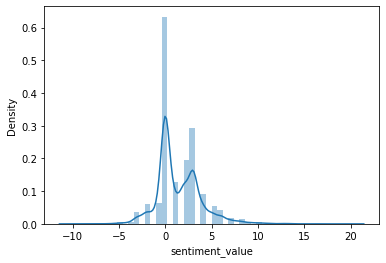

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

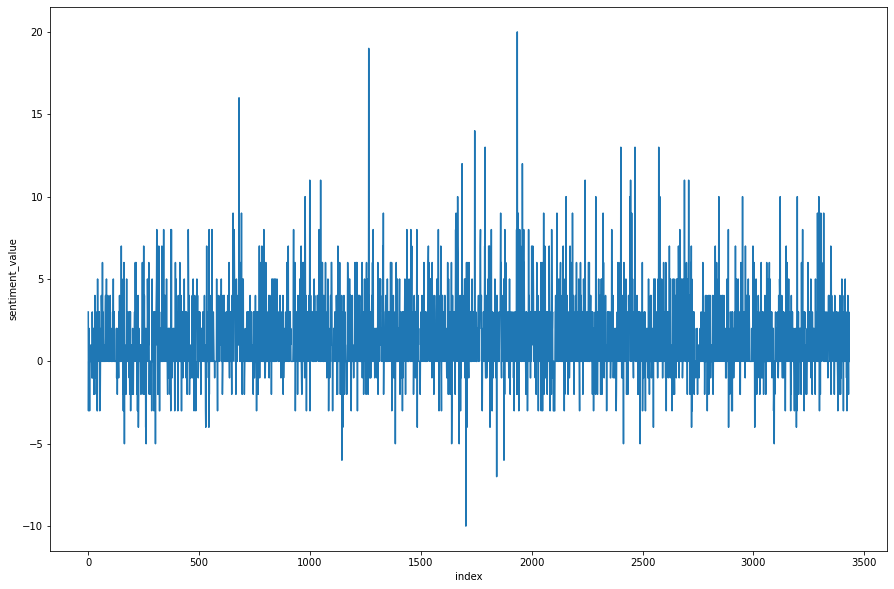

In [95]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

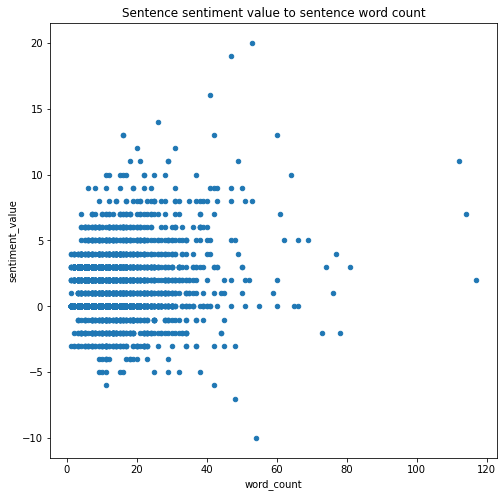

In [96]:
sent_df.plot.scatter(x='word_count',
                     y='sentiment_value',
                     figsize=(8,8),
                     title='Sentence sentiment value to sentence word count')

In [97]:
# PW for positive words 
# NW for Negative Words 
PW=pd.read_csv("C:/Users/icon/Downloads/positive-words.txt", error_bad_lines = False)
PW

C:\Users\icon\AppData\Local\Temp\ipykernel_6628\1513218809.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  PW=pd.read_csv("C:/Users/icon/Downloads/positive-words.txt", error_bad_lines = False)
b'Skipping line 10: expected 1 fields, saw 2\nSkipping line 14: expected 1 fields, saw 5\nSkipping line 15: expected 1 fields, saw 3\nSkipping line 16: expected 1 fields, saw 2\nSkipping line 18: expected 1 fields, saw 3\nSkipping line 19: expected 1 fields, saw 3\nSkipping line 27: expected 1 fields, saw 3\nSkipping line 28: expected 1 fields, saw 2\n'


,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
0,;
1,; Opinion Lexicon: Positive
2,;
3,; This file contains a list of POSITIVE opinio...
4,;
...,...
2026,youthful
2027,zeal
2028,zenith
2029,zest


In [98]:
NW=pd.read_csv("C:/Users/icon/Downloads/negative-words.txt", error_bad_lines = False,encoding='latin-1')
NW

C:\Users\icon\AppData\Local\Temp\ipykernel_6628\374790090.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  NW=pd.read_csv("C:/Users/icon/Downloads/negative-words.txt", error_bad_lines = False,encoding='latin-1')
b'Skipping line 10: expected 1 fields, saw 2\nSkipping line 14: expected 1 fields, saw 5\nSkipping line 15: expected 1 fields, saw 3\nSkipping line 16: expected 1 fields, saw 2\nSkipping line 18: expected 1 fields, saw 3\nSkipping line 19: expected 1 fields, saw 3\nSkipping line 27: expected 1 fields, saw 3\nSkipping line 28: expected 1 fields, saw 2\n'


,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
0,;
1,; Opinion Lexicon: Negative
2,;
3,; This file contains a list of NEGATIVE opinio...
4,;
...,...
4803,zaps
4804,zealot
4805,zealous
4806,zealously


In [99]:
PW =PW.iloc[25:]
PW =PW.rename(columns={';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;':'Words'})
PW.reset_index(inplace=True)
PW =PW.drop('index',axis=1)
PW['Score'] = 1
PW

,Words,Score
0,a+,1
1,abound,1
2,abounds,1
3,abundance,1
4,abundant,1
...,...,...
2001,youthful,1
2002,zeal,1
2003,zenith,1
2004,zest,1


In [100]:
NW = NW.iloc[25:]
NW = NW.rename(columns={';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;':'Words'})
NW.reset_index(inplace=True)
NW = NW.drop('index',axis=1)
NW['Score'] = -1
NW

,Words,Score
0,2-faced,-1
1,2-faces,-1
2,abnormal,-1
3,abolish,-1
4,abominable,-1
...,...,...
4778,zaps,-1
4779,zealot,-1
4780,zealous,-1
4781,zealously,-1


In [101]:
affinity_scores1 = PW.set_index('Words')['Score'].to_dict()
affinity_scores2 = NW.set_index('Words')['Score'].to_dict()
affinity_scores1.update(affinity_scores2)
affinity_scores = affinity_scores1
affinity_scores

{'a+': 1,
 'abound': 1,
 'abounds': 1,
 'abundance': 1,
 'abundant': 1,
 'accessable': 1,
 'accessible': 1,
 'acclaim': 1,
 'acclaimed': 1,
 'acclamation': 1,
 'accolade': 1,
 'accolades': 1,
 'accommodative': 1,
 'accomodative': 1,
 'accomplish': 1,
 'accomplished': 1,
 'accomplishment': 1,
 'accomplishments': 1,
 'accurate': 1,
 'accurately': 1,
 'achievable': 1,
 'achievement': 1,
 'achievements': 1,
 'achievible': 1,
 'acumen': 1,
 'adaptable': 1,
 'adaptive': 1,
 'adequate': 1,
 'adjustable': 1,
 'admirable': 1,
 'admirably': 1,
 'admiration': 1,
 'admire': 1,
 'admirer': 1,
 'admiring': 1,
 'admiringly': 1,
 'adorable': 1,
 'adore': 1,
 'adored': 1,
 'adorer': 1,
 'adoring': 1,
 'adoringly': 1,
 'adroit': 1,
 'adroitly': 1,
 'adulate': 1,
 'adulation': 1,
 'adulatory': 1,
 'advanced': 1,
 'advantage': 1,
 'advantageous': 1,
 'advantageously': 1,
 'advantages': 1,
 'adventuresome': 1,
 'adventurous': 1,
 'advocate': 1,
 'advocated': 1,
 'advocates': 1,
 'affability': 1,
 'affable'

In [102]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        #print(sentence)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0) #return 0 if key not found
    return sent_score

In [103]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [104]:
sent_df

,sentence,sentiment_value,word_count,index
0,I waited a few months to write this review bec...,1,19,0
1,I am a former die-hard Fitbit user and I never...,-2,15,1
2,My Fitbit did it all and for a third of the pr...,0,12,2
3,"Sure it had annoying quirks and short-comings,...",-1,27,3
4,"Well, when Fitbit got greedy and moved all of ...",2,22,4
...,...,...,...,...
3428,Using this to keep track of my physical\nactiv...,0,9,3428
3429,My first Apple Watch didnt disappoint @ all.,-1,8,3429
3430,"So I bought a new one, and loving it.",1,9,3430
3431,I highly recommend buying 45mm.,1,5,3431


In [105]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df

,sentence,sentiment_value,word_count,index
0,I waited a few months to write this review bec...,1,19,0
1,I am a former die-hard Fitbit user and I never...,-2,15,1
2,My Fitbit did it all and for a third of the pr...,0,12,2
3,"Sure it had annoying quirks and short-comings,...",-1,27,3
4,"Well, when Fitbit got greedy and moved all of ...",2,22,4
...,...,...,...,...
3428,Using this to keep track of my physical\nactiv...,0,9,3428
3429,My first Apple Watch didnt disappoint @ all.,-1,8,3429
3430,"So I bought a new one, and loving it.",1,9,3430
3431,I highly recommend buying 45mm.,1,5,3431


In [106]:
sent_df.sort_values(by='sentiment_value').tail()

,sentence,sentiment_value,word_count,index
2466,Apple Watch arrived on time and works great a...,6,42,2466
1769,Love my Apple Watch except battery doesnt see...,6,51,1769
1743,Enjoying my watch Good watch I really like it ...,6,26,1743
2234,Cant get any better YO BUY DIS WATCH Me gustó...,7,69,2234
1935,Just upgraded from generation 1 so happy I did...,7,53,1935


In [107]:
sent_df.sort_values(by='sentiment_value').head()

,sentence,sentiment_value,word_count,index
1703,I was expecting to get more monitoring functio...,-5,54,1703
261,"It is concerning, as a dead battery could pose...",-3,11,261
544,Too bad they put such a difficult watchband on...,-3,12,544
420,The reason I did this was to try to make sure ...,-3,37,420
2892,It senses if you fall and tries to make you mo...,-3,15,2892


In [108]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    3433.000000
mean        0.608506
std         1.122174
min        -5.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         7.000000
Name: sentiment_value, dtype: float64

In [109]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<0].head()

,sentence,sentiment_value,word_count,index
1,I am a former die-hard Fitbit user and I never...,-2,15,1
3,"Sure it had annoying quirks and short-comings,...",-1,27,3
6,I HATED it.,-1,3,6
22,I looked online and could find nothing about t...,-1,16,22
25,Toggling back and forth between dates messes w...,-1,10,25


In [110]:
sent_df[sent_df['sentiment_value']<-1]

,sentence,sentiment_value,word_count,index
1,I am a former die-hard Fitbit user and I never...,-2,15,1
52,I have had no issues with syncing or lack of f...,-2,11,52
156,"My husband was adamant to buy it from Amazon, ...",-2,25,156
163,Not saying the bad reviews are lies; but with ...,-3,32,163
170,"Sure, theres always going to be an unfortunat...",-2,33,170
191,I put one bad scratch on my aluminum crystal.,-2,9,191
243,"If something is wrong, Amazon will help you, d...",-2,18,243
255,The one that comes with my watch tends to pinc...,-2,23,255
259,After ordering and receiving it today (after b...,-2,19,259
261,"It is concerning, as a dead battery could pose...",-3,11,261


In [111]:
sent_df[sent_df['sentiment_value']<-1].head(20)['sentence']

1      I am a former die-hard Fitbit user and I never...
52     I have had no issues with syncing or lack of f...
156    My husband was adamant to buy it from Amazon, ...
163    Not saying the bad reviews are lies; but with ...
170    Sure, theres always going to be an unfortunat...
191        I put one bad scratch on my aluminum crystal.
243    If something is wrong, Amazon will help you, d...
255    The one that comes with my watch tends to pinc...
259    After ordering and receiving it today (after b...
261    It is concerning, as a dead battery could pose...
300    However I manage to get a couple of scratches ...
322    Over the years, every non-name brand, jewelry ...
390    Had I not had this watch I would have just tho...
420    The reason I did this was to try to make sure ...
421    So far the watch seems to indicate that Im OK...
468                                 Fat finger syndrome!
485    I got a plastic film protector very soon after...
507    Colors are true to reali

In [112]:
sent_df[sent_df['sentiment_value']<-1].head(5)['sentence'].tolist()

['I am a former die-hard Fitbit user and I never, ever wanted an Apple Watch.',
 'I have had no issues with syncing or lack of functionality.',
 'My husband was adamant to buy it from Amazon, especially after reading all kinds of reviews about how people got empty boxes or bad watches.',
 'Not saying the bad reviews are lies; but with Amazon and any other online stores, it\x92s always a risk you\x92re taking the moment you click add to cart and buy it now.',
 'Sure, there\x92s always going to be an unfortunate few who receive a factory defective product, but at this price I was willing to risk the time and potential headache of exchange or refund.']

In [113]:
sent_df['index'] = range(0, len(sent_df))

C:\Users\icon\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

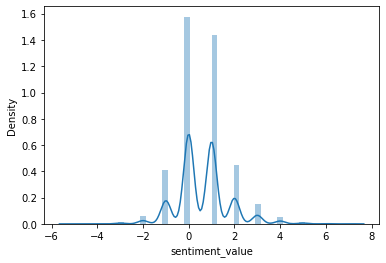

In [114]:
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

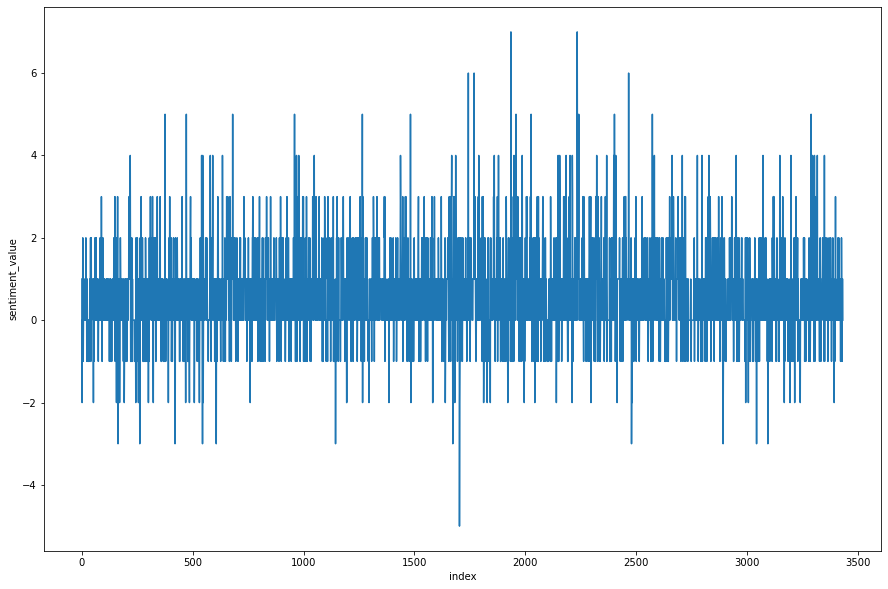

In [115]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

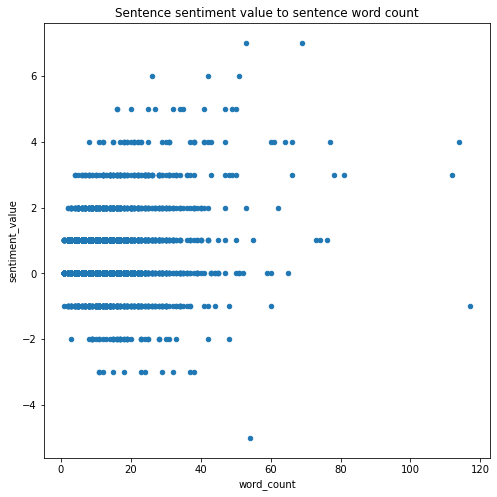

In [116]:
sent_df.plot.scatter(x='word_count',
                     y='sentiment_value',
                     figsize=(8,8),
                     title='Sentence sentiment value to sentence word count')

#### The file for  stop, Positive and Negative words cant give us better results for sentimental analysis as compared to afinn which gives us better analysis.